import

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob  # Import glob to list CSV files
import pandas as pd
from tabulate import tabulate
from scipy.stats import norm

Import non diabetic and diabetic datas

In [98]:
folder_path = 'data_for_diabetes/'
diabetic = glob.glob(folder_path + 'case *.csv') 

for file in diabetic:

    df = pd.read_csv(file)

nondiabetic = pd.read_csv('data for no diabetes.csv')

Diabetic BG vs Time

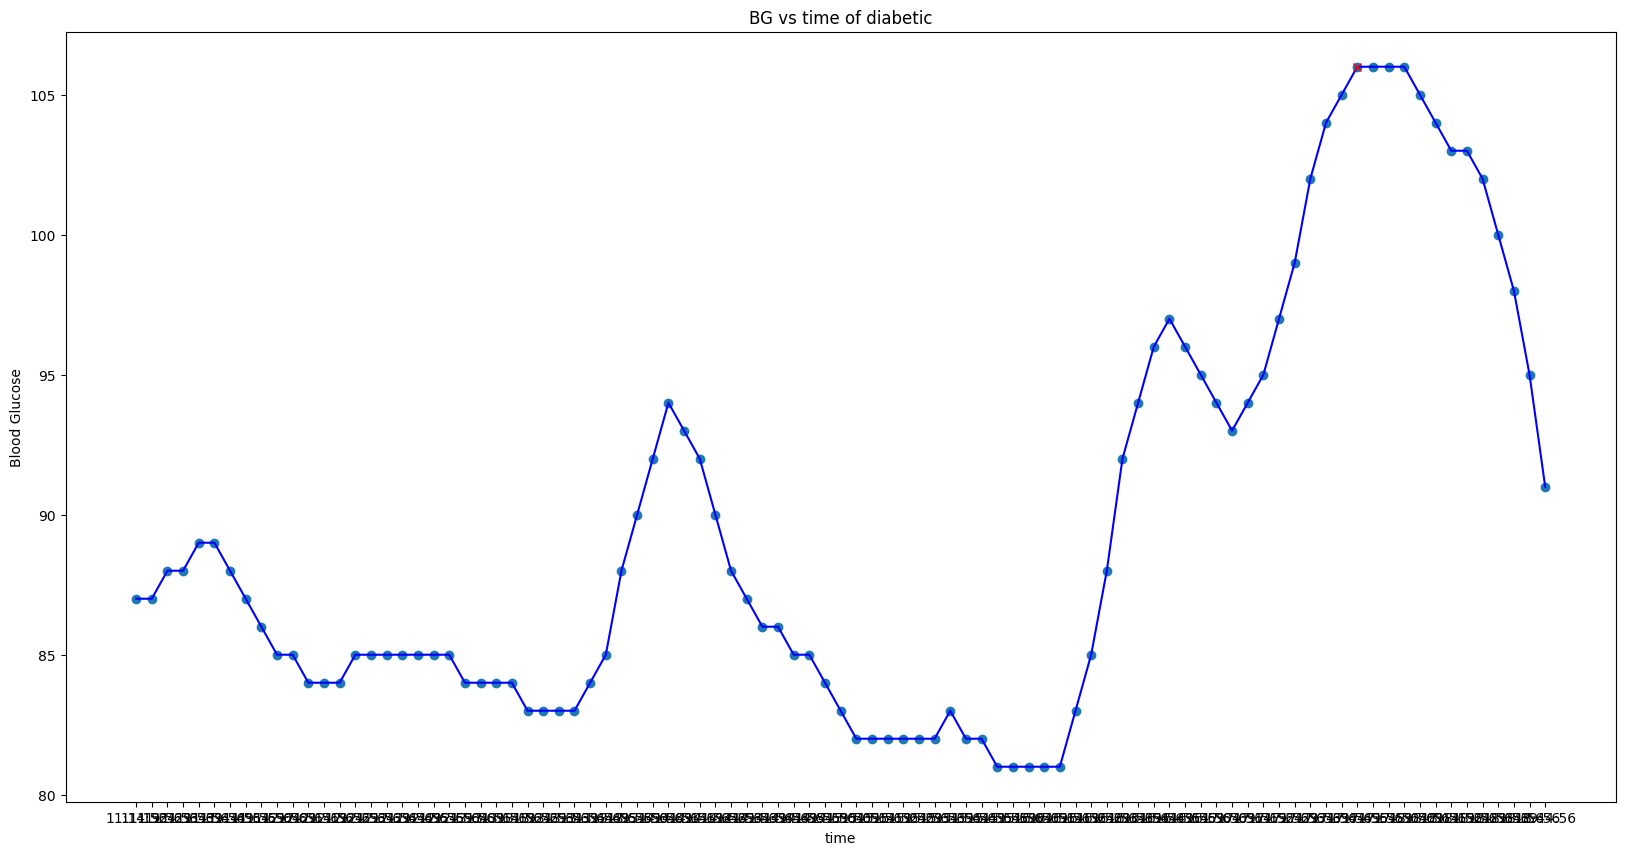

In [99]:
plt.figure(figsize=(20, 10))
x = df.iloc[134:225 , 1]
y = df.iloc[134:225 , 2]

plt.scatter(x, y)

plt.title('BG vs time of diabetic')
plt.xlabel('time')
plt.ylabel('Blood Glucose')

plt.plot(x, y, color='blue')

max_y = y.max()  
max_x = x[y.idxmax()]  

# Highlighting the highest point
plt.plot(max_x, max_y, "x", color='red')

plt.show()


Diabetic analyse

In [100]:
df_diabetic = df.iloc[134:225, 2]

mean_diabetic = df_diabetic.mean()
median_diabetic = df_diabetic.median()
range_diabetic = df_diabetic.max() - df_diabetic.min()
std_diabetic = df_diabetic.std()


stats_df = pd.DataFrame({
    'Statistic Diabetic': ['Mean', 'Median', 'Range', 'Standard Deviation'],
    'Value': [mean_diabetic, median_diabetic, range_diabetic, std_diabetic]
})

print(tabulate(stats_df, headers='keys', tablefmt='fancy_grid'))

╒════╤══════════════════════╤══════════╕
│    │ Statistic Diabetic   │    Value │
╞════╪══════════════════════╪══════════╡
│  0 │ Mean                 │ 89.4945  │
├────┼──────────────────────┼──────────┤
│  1 │ Median               │ 87       │
├────┼──────────────────────┼──────────┤
│  2 │ Range                │ 25       │
├────┼──────────────────────┼──────────┤
│  3 │ Standard Deviation   │  7.50759 │
╘════╧══════════════════════╧══════════╛


Nondiabetic BG vs Time

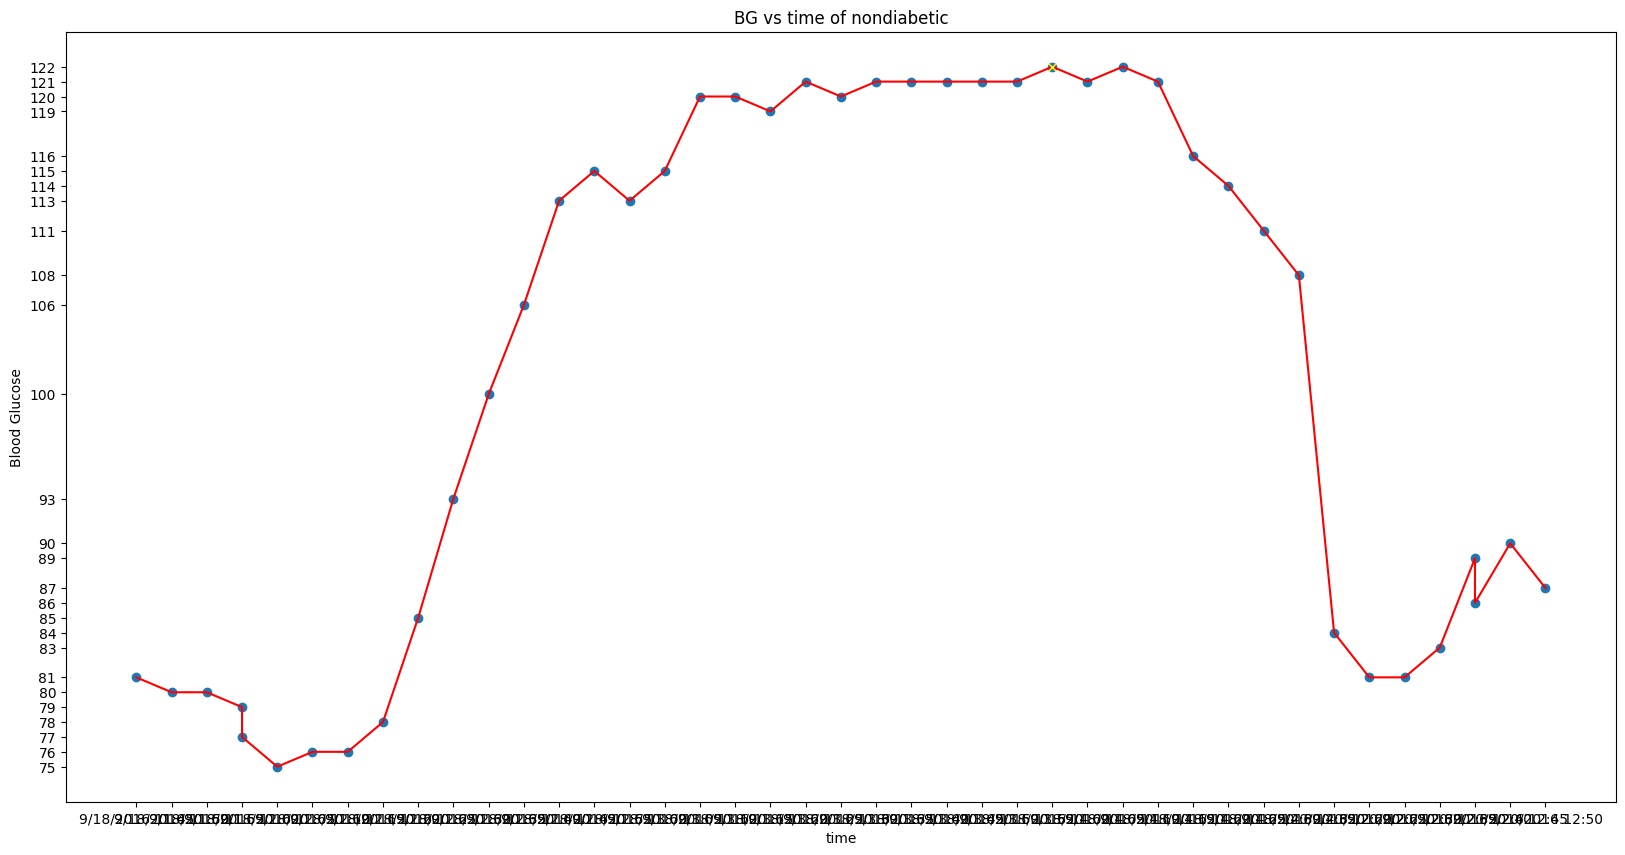

In [101]:

plt.figure(figsize=(20, 10))
x = nondiabetic.iloc[309:352, 2]
y = data = pd.to_numeric(nondiabetic.iloc[309:352, 3], errors='coerce')
plt.scatter(x, y)

plt.title('BG vs time of nondiabetic')
plt.xlabel('time')
plt.ylabel('Blood Glucose')



sorted_y = np.sort(y.unique())
plt.yticks(sorted_y)

plt.plot(x, y, color='red')

max_y = y.max()  
max_x = x[y.idxmax()]  


plt.plot(max_x, max_y, "x", color='yellow')


Nondiabetic analyse

In [102]:
df_nondiabetic = pd.to_numeric(nondiabetic.iloc[1:50, 3], errors='coerce') #from stackoverflow, this ignores the non-numeric number 

mean_nondiabetic = df_nondiabetic.mean()
mean_nondiabetic = df_nondiabetic.mean()
median_nondiabetic = df_nondiabetic.median()
range_nondiabetic = df_nondiabetic.max() - df_nondiabetic.min()
std_nondiabetic = df_nondiabetic.std()


stats_df = pd.DataFrame({
    'Statistic nondiabetic': ['Mean', 'Median', 'Range', 'Standard Deviation'],
    'Value': [mean_nondiabetic, median_nondiabetic, range_nondiabetic, std_nondiabetic]
})
print(tabulate(stats_df, headers='keys', tablefmt='fancy_grid'))

╒════╤═════════════════════════╤══════════╕
│    │ Statistic nondiabetic   │    Value │
╞════╪═════════════════════════╪══════════╡
│  0 │ Mean                    │ 78.9592  │
├────┼─────────────────────────┼──────────┤
│  1 │ Median                  │ 79       │
├────┼─────────────────────────┼──────────┤
│  2 │ Range                   │ 22       │
├────┼─────────────────────────┼──────────┤
│  3 │ Standard Deviation      │  4.58239 │
╘════╧═════════════════════════╧══════════╛


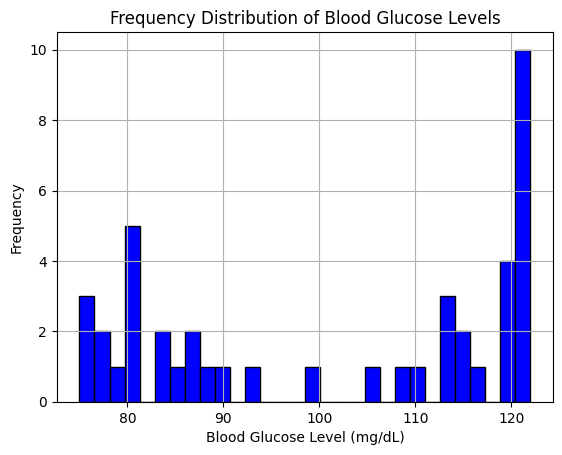

In [103]:




nondiabetic_hist = pd.to_numeric(nondiabetic.iloc[1:50, 3], errors='coerce')


nondiabetic_hist = data.dropna()


plt.hist(nondiabetic_hist, bins=30, edgecolor='black', color='blue') 
plt.title('Frequency Distribution of Blood Glucose Levels')
plt.xlabel('Blood Glucose Level (mg/dL)')
plt.ylabel('Frequency')
plt.grid(True)  
plt.show()


making a distribution graph of diabetic

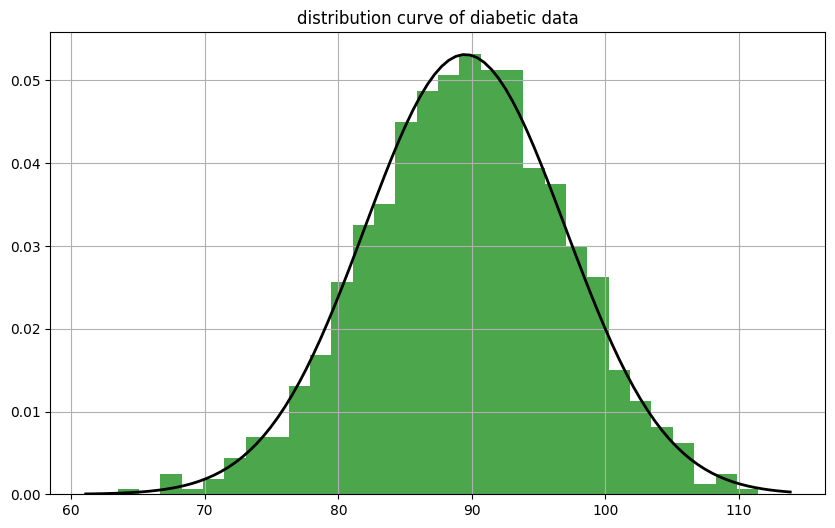

In [108]:


mean = mean_diabetic  
std_dev = std_diabetic  


data = np.random.normal(mean, std_dev, 1000)


plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.7, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf_values = norm.pdf(x, mean, std_dev)

plt.plot(x, pdf_values, 'k', linewidth=2) #the normal dist. curve


plt.title("distribution curve of diabetic data" )
plt.grid(True)  
plt.show()


distribution for Nondiabetic

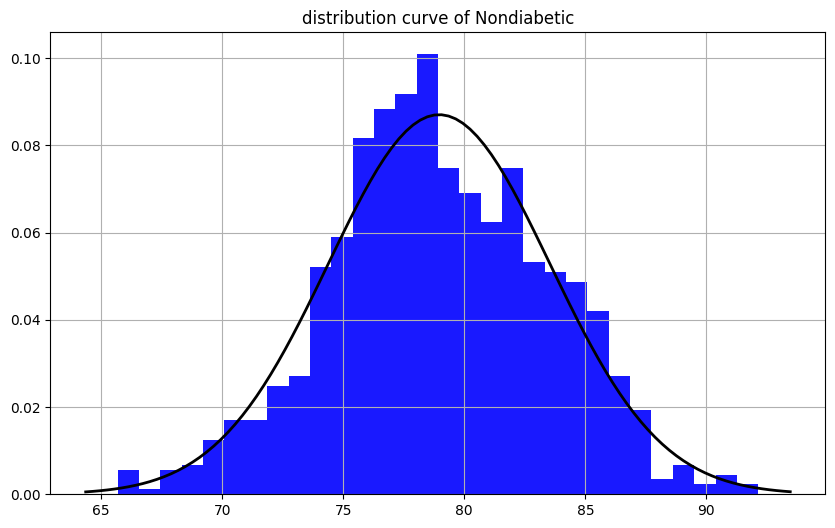

In [109]:


mean = mean_nondiabetic  
std_dev = std_nondiabetic  


data = np.random.normal(mean, std_dev, 1000)


plt.figure(figsize=(10, 6))

plt.hist(data, bins=30, density=True, alpha=0.9, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

pdf_values = norm.pdf(x, mean, std_dev)

plt.plot(x, pdf_values, 'k', linewidth=2) #the normal dist. curve

plt.title("distribution curve of Nondiabetic")

plt.grid(True)  
plt.show()
